In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_dir = Path('C:/Users/exam18/Desktop/Home_Automation_using_GestureRecognition-main/Dataset')
image_count = len(list(dataset_dir.glob('*/*.png')))
print(image_count)

14407


In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

NameError: name 'train_ds' is not defined

<Figure size 1000x1000 with 0 Axes>

In [5]:
batch_size = 32
img_height = 100
img_width = 89
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14407 files belonging to 12 classes.
Using 11526 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14407 files belonging to 12 classes.
Using 2881 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Direction_left', 'Direction_right', 'Fist', 'Five-palm', 'Four', 'OK', 'One', 'Stop', 'Three', 'Thumbs_down', 'Thumbs_up', 'Two']


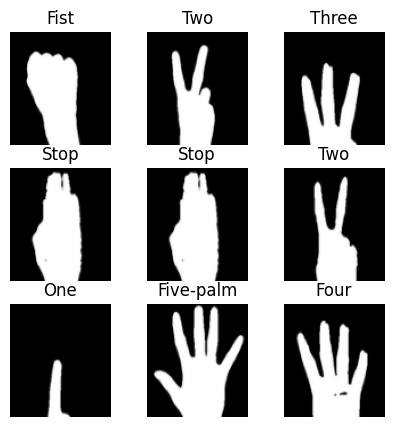

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 89, 3)
(32,)


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 89, 3)        0         
                                                                 
 conv2d (Conv2D)             (None, 100, 89, 16)       448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 44, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 44, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 22, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 22, 64)        1

In [12]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


301/301 [==============================] - 69s 199ms/step - loss: 0.0855 - accuracy: 0.9775 - val_loss: 0.0026 - val_accuracy: 0.9992
Epoch 2/10
301/301 [==============================] - 57s 190ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 4.1634e-04 - val_accuracy: 1.0000
Epoch 3/10
301/301 [==============================] - 54s 181ms/step - loss: 9.2465e-04 - accuracy: 0.9997 - val_loss: 0.0052 - val_accuracy: 0.9988
Epoch 4/10
301/301 [==============================] - 53s 177ms/step - loss: 9.8287e-04 - accuracy: 0.9998 - val_loss: 0.0029 - val_accuracy: 0.9988
Epoch 5/10
301/301 [==============================] - 54s 179ms/step - loss: 9.5393e-06 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9996
Epoch 6/10
301/301 [==============================] - 51s 171ms/step - loss: 2.7516e-06 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 7/10
301/301 [==============================] - 54s 179ms/step - loss: 1.8164e-06 - accuracy: 1.0000 - val_loss: 0.

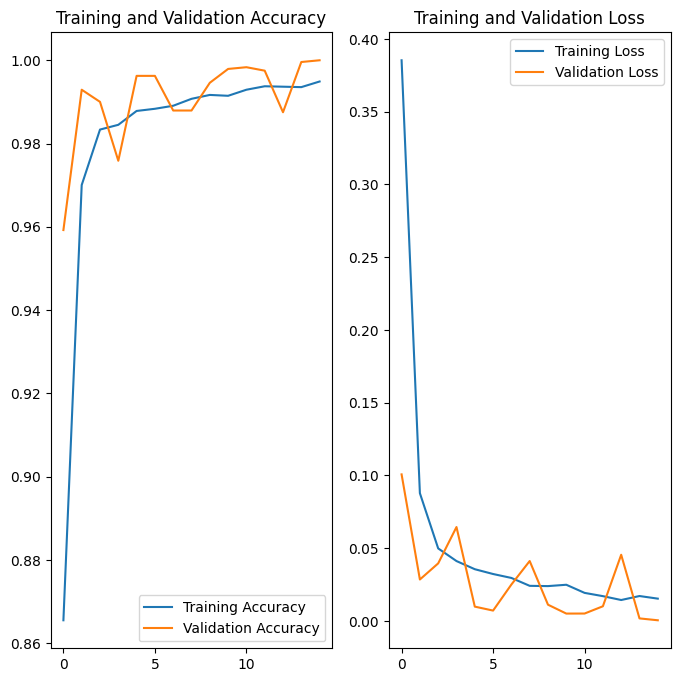

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [15]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Reshape((12, -1)),
  layers.LSTM(64), 
  layers.Dense(128, activation='relu'),
  layers.Dense(12, name="outputs")
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 100, 89, 3)        0         
                                                                 
 rescaling_1 (Rescaling)     (None, 100, 89, 3)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 89, 16)       448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 50, 44, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 44, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 25, 22, 32)        0         
 g2D)                                                 

In [19]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
361/361 [==============================] - 12s 33ms/step - loss: 0.0797 - accuracy: 0.9719 - val_loss: 0.0282 - val_accuracy: 0.9906
Epoch 2/20
361/361 [==============================] - 13s 35ms/step - loss: 0.0528 - accuracy: 0.9803 - val_loss: 0.0481 - val_accuracy: 0.9778
Epoch 3/20
361/361 [==============================] - 13s 35ms/step - loss: 0.0532 - accuracy: 0.9830 - val_loss: 0.0244 - val_accuracy: 0.9889
Epoch 4/20
361/361 [==============================] - 13s 35ms/step - loss: 0.0420 - accuracy: 0.9839 - val_loss: 0.0207 - val_accuracy: 0.9955
Epoch 5/20
361/361 [==============================] - 13s 35ms/step - loss: 0.0396 - accuracy: 0.9863 - val_loss: 0.0095 - val_accuracy: 0.9983
Epoch 6/20
361/361 [==============================] - 13s 36ms/step - loss: 0.0256 - accuracy: 0.9906 - val_loss: 0.0126 - val_accuracy: 0.9951
Epoch 7/20
361/361 [==============================] - 13s 36ms/step - loss: 0.0382 - accuracy: 0.9866 - val_loss: 0.0145 - val_accuracy:

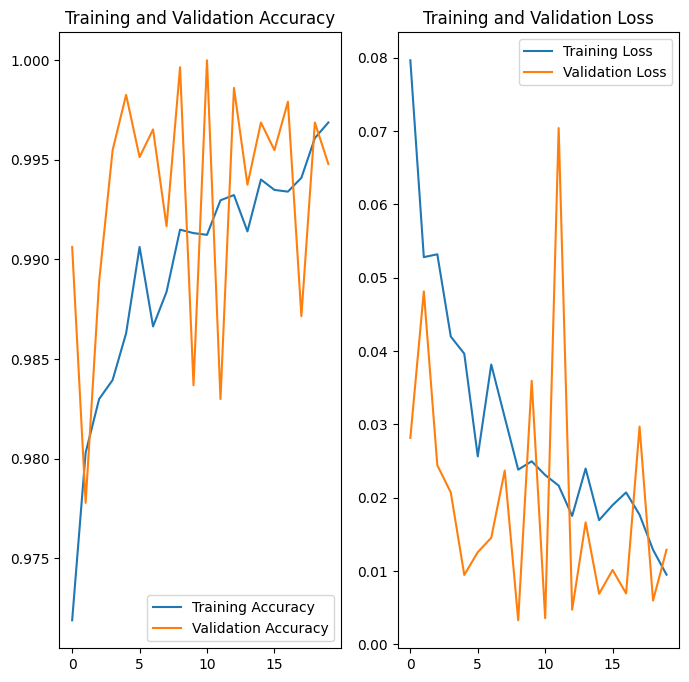

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
model.save('C:/Users/exam18/Desktop/Home_Automation_using_GestureRecognition-main/TrainedModel/Gesture12RecognitionModelBest.keras')

In [23]:
sunflower_url =  Path('C:/Users/exam18/Desktop/114_l=0.png')


img = tf.keras.utils.load_img(
    sunflower_url, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 23ms/step
This image most likely belongs to Direction_left with a 99.98 percent confidence.


In [29]:
from tensorflow.keras.models import load_model
saved_model_path = 'C:/Users/exam18/Desktop/Home_Automation_using_GestureRecognition-main/TrainedModel/Gesture12RecognitionModelBest.keras'
loaded_model = load_model(saved_model_path)


In [68]:
sunflower_url =  Path('D:/movies/200_l=8.png')


img = tf.keras.utils.load_img(
    sunflower_url, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = loaded_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 42ms/step
This image most likely belongs to Three with a 99.92 percent confidence.


In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Dropout, Flatten, Dense,Conv2DTranspose,UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
saved_model_path = 'C:/Users/exam18/Desktop/Home_Automation_using_GestureRecognition-main/TrainedModel/Gesture12RecognitionModelBest.keras'
loaded_model = load_model(saved_model_path)
#import tflearn
#from tflearn.layers.conv import conv_2d, max_pool_2d
#from tflearn.layers.core import input_data, dropout, fully_connected
#from tflearn.layers.estimator import regression
from tensorflow.python.framework import ops
import numpy as np
from PIL import Image
import cv2
import imutils
import os
from sklearn.preprocessing import LabelEncoder
from PalmTracker import *

In [32]:
def main():
    # initialize weight for running average
    aWeight = 0.5

    # get the reference to the webcam
    camera = cv2.VideoCapture(0)

    # region of interest (ROI) coordinates
    top, right, bottom, left = 10, 350, 225, 590

    # initialize num of frames
    num_frames = 0
    start_recording = False

    # keep looping, until interrupted
    while(True):
        # get the current frame
        (grabbed, frame) = camera.read()

        # resize the frame
        frame = imutils.resize(frame, width=700)

        # flip the frame so that it is not the mirror view
        frame = cv2.flip(frame, 1)

        # clone the frame
        clone = frame.copy()

        # get the height and width of the frame
        (height, width) = frame.shape[:2]

        # get the ROI
        roi = frame[top:bottom, right:left]

        # convert the roi to grayscale and blur it
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (7, 7), 0)

        # to get the background, keep looking till a threshold is reached
        # so that our running average model gets calibrated
        if num_frames < 30:
            run_avg(gray, aWeight)
            print(num_frames)

        else:
            # segment the hand region
            hand = segment(gray)

            # check whether hand region is segmented
            if hand is not None:
                # if yes, unpack the thresholded image and
                # segmented region
                (thresholded, segmented) = hand

                # draw the segmented region and display the frame
                cv2.drawContours(
                    clone, [segmented + (right, top)], -1, (0, 0, 255))
                if start_recording:
                    cv2.imwrite('Temp.png', thresholded)
                    resizeImage('Temp.png')
                    predictedClass, confidence = getPredictedClass()
                    showStatistics(predictedClass, confidence)

                    # PUBNUB integration

                    the_update = str(int(predictedClass)+1)
                    the_message = {"entry": ENTRY, "update": the_update}
                    envelope = pubnub.publish().channel(CHANNEL).message(the_message).sync()


                    if envelope.status.is_error():
                        print("[PUBLISH: fail]")
                        print("error: {}".format(status.error))
                    else:
                        print("[PUBLISH: sent]")
                        print(f"Sent: {the_update}")

                    # PUBNUB integration

                cv2.imshow("Thresholded", thresholded)

        # draw the segmented hand
        cv2.rectangle(clone, (left, top), (right, bottom), (0, 255, 0), 2)

        # increment the number of frames
        num_frames += 1

        # display the frame with segmented hand
        cv2.imshow("Video Feed", clone)

        # observe the keypress by the user
        keypress = cv2.waitKey(1) & 0xFF

        # if the user pressed "q", then stop looping
        if keypress == ord("q"):
            the_update = KILL_CONNECTION
            break

        if keypress == ord("s"):
            start_recording = True


# Model defined


main()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


NameError: name 'resizeImage' is not defined

In [33]:
def getPredictedClass():
    image = cv2.imread('Temp.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_image, (89, 100)) 
    rgb_img = cv2.cvtColor(resized_img, cv2.COLOR_GRAY2RGB)
    normalized_img = rgb_img / 255.0
    input_img = np.expand_dims(normalized_img, axis=0)
    plt.imshow(rgb_img) 

    

    # Create a batch

    # Make predictions
    predictions = loaded_model.predict(input_img)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
    return class_names[np.argmax(score)], 100 * np.max(score)

def get_labels_rev():

    gestures = []
    with open('C:/deva/Miniproject/automation-using-hand-gestures-master/preprocessing/gestures.txt', 'r') as f:
        for line in f:
            line = line.strip()
            gestures.append(line)

    gestures.sort()
    gestures = np.array([gestures[i] for i in range(len(gestures))])
    integer_encoded = LabelEncoder().fit_transform(gestures)

    labels = {}
    for i in range(len(gestures)):
        labels[integer_encoded[i]] = gestures[i]

    # print(labels)

    return labels

In [34]:
def resizeImage(imageName):
    basewidth = 100
    img = Image.open(imageName)
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    img.save(imageName)

In [37]:
#labels = get_labels_rev()
func_map = {
    'Thumbs_up': 'Red ON',            # thumbs up
    'Thumbs_down': 'Red half ON',       # thumbs down
    'Fist': 'Red OFF',            # fist

    'Two': 'Green ON',          # two
    'Three': 'Green half ON',      # three
    'Four': 'Green OFF',          # four

    'OK': 'Get rain-value',        # ok

    'One': 'Fan ON',             # one
    'Stop': 'Fan OFF',            # stop

    'Direction_right': 'TV channel change',     # right

    'Five-palm': 'Clean floor'         # palm-five
}


def showStatistics(predictedClass, confidence):

    textImage = np.zeros((250, 512, 3), np.uint8)
    className = labels.get(int(predictedClass), "Unknown")

    cv2.putText(textImage, "Predicted class: " + className,
                (5, 30),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (255, 255, 255),
                1)

    cv2.putText(textImage, "Confidence: " + str(confidence * 100) + '%',
                (5, 100),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (255, 255, 255),
                1)

    cv2.putText(textImage, "Actuate: " + func_map[str(predictedClass+1)],
                (5, 170),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (0, 255, 0),
                1)

    cv2.imshow("Statistics", textImage)

In [38]:
from pubnub.callbacks import SubscribeCallback
from pubnub.enums import PNStatusCategory
from pubnub.pnconfiguration import PNConfiguration
from pubnub.pubnub import PubNub

ENTRY = "GestureControl"
CHANNEL = "Detect"
KILL_CONNECTION = "exit"
the_update = None

pnconfig = PNConfiguration()
pnconfig.publish_key = 'pub-c-75f1104f-f51c-4d31-9f65-a763a31e7dad'
pnconfig.subscribe_key = 'sub-c-11c98f38-0c15-45a2-949e-f881da6b6a1f'
pnconfig.uuid = "serverUUID-PUB"

pubnub = PubNub(pnconfig)

In [41]:
def main():
    # initialize weight for running average
    aWeight = 0.5

    # get the reference to the webcam
    camera = cv2.VideoCapture(0)

    # region of interest (ROI) coordinates
    top, right, bottom, left = 10, 350, 225, 590

    # initialize num of frames
    num_frames = 0
    start_recording = False

    # keep looping, until interrupted
    while(True):
        # get the current frame
        (grabbed, frame) = camera.read()

        # resize the frame
        frame = imutils.resize(frame, width=700)

        # flip the frame so that it is not the mirror view
        frame = cv2.flip(frame, 1)

        # clone the frame
        clone = frame.copy()

        # get the height and width of the frame
        (height, width) = frame.shape[:2]

        # get the ROI
        roi = frame[top:bottom, right:left]

        # convert the roi to grayscale and blur it
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (7, 7), 0)

        # to get the background, keep looking till a threshold is reached
        # so that our running average model gets calibrated
        if num_frames < 30:
            run_avg(gray, aWeight)
            print(num_frames)

        else:
            # segment the hand region
            hand = segment(gray)

            # check whether hand region is segmented
            if hand is not None:
                # if yes, unpack the thresholded image and
                # segmented region
                (thresholded, segmented) = hand

                # draw the segmented region and display the frame
                cv2.drawContours(
                    clone, [segmented + (right, top)], -1, (0, 0, 255))
                if start_recording:
                    cv2.imwrite('Temp.png', thresholded)
                    resizeImage('Temp.png')
                    sunflower_url =  Path('Home_Automation_using_GestureRecognition-main\Temp.png')


                    img = tf.keras.utils.load_img(
                        sunflower_url, target_size=(img_height, img_width)
                    )
                    img_array = tf.keras.utils.img_to_array(img)
                    img_array = tf.expand_dims(img_array, 0) # Create a batch

                    predictions = loaded_model.predict(img_array)
                    score = tf.nn.softmax(predictions[0])

                    print(
                        "This image most likely belongs to {} with a {:.2f} percent confidence."
                        .format(class_names[np.argmax(score)], 100 * np.max(score))
                    )
                   
                    #showStatistics(predictedClass, confidence)

                    # PUBNUB integration

                    

                    # PUBNUB integration

                cv2.imshow("Thresholded", thresholded)

        # draw the segmented hand
        cv2.rectangle(clone, (left, top), (right, bottom), (0, 255, 0), 2)

        # increment the number of frames
        num_frames += 1

        # display the frame with segmented hand
        cv2.imshow("Video Feed", clone)

        # observe the keypress by the user
        keypress = cv2.waitKey(1) & 0xFF

        # if the user pressed "q", then stop looping
        if keypress == ord("q"):
            the_update = KILL_CONNECTION
            break

        if keypress == ord("s"):
            start_recording = True


# Model defined


main()
